# kMeans

[[3 4 4]
 [5 2 3]
 [6 8 9]
 [1 4 4]
 [7 7 5]
 [8 8 9]
 [3 3 7]
 [4 9 4]]


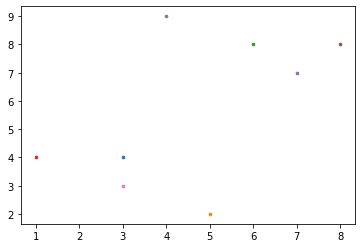

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Data
df = pd.read_table('../data/table12.txt', delim_whitespace=True, index_col=0)
df = df[["x", "y", "z"]].to_numpy()
print(df)
X=df

# Number of training data
n = X.shape[0]
# Number of features in the data
c = X.shape[1]

# Plot
for i in range(n):
    plt.scatter(X[i, 0], X[i,1], s=7)

## Loyds version:

In [3]:
from copy import deepcopy

# Number of clusters
K = 2
# Number of training data
n = X.shape[0]
# Number of features in the data
c = X.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(X, axis = 0)
std = np.std(X, axis = 0)
centers = np.random.randn(K,c)*std + mean
# given start clusters
centers = np.array([[3, 4, 4],
                   [8, 8, 9]]).astype(float)

centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

clusters = np.zeros(n)
distances = np.zeros((n,K))

for i,c in enumerate(centers):
    print(f"Starting C{i+1} = {c.tolist()}")

error = np.linalg.norm(centers_new - centers_old, ord=2)
counter = 1
# When, after an update, the estimate of that center stays the same, exit loop
while error != 0:
    print("================================================")
    print(f"Step: {counter}")
    counter += 1
    # Measure the distance to all k center
    for i in range(K):
        distances[:,i] = np.linalg.norm(X - centers_new[i], axis=1, ord=2)
        print(f"d(X,C{i+1}) = {distances[:,i]}")
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    print(f"Assign points to clostest Cluster: {clusters+1}")
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    print(f"Calculate mean over all points in every cluster to update centers:")
    for i in range(K):
        centers_new[i] = np.mean(X[clusters == i], axis=0)
        print(f"C{i+1} = means({(X[clusters == i]).tolist()}) = {centers_new[i]}")
    error = np.linalg.norm(centers_new - centers_old, ord=2)
centers_new   

print(f"Final cluster assignments: {clusters+1}")
print(f"Final centers: {centers_new}")


Starting C1 = [3.0, 4.0, 4.0]
Starting C2 = [8.0, 8.0, 9.0]
Step: 1
d(X,C1) = [0.         3.         7.07106781 2.         5.09901951 8.1240384
 3.16227766 5.09901951]
d(X,C2) = [8.1240384  9.         2.         9.48683298 4.24264069 0.
 7.34846923 6.4807407 ]
Assign points to clostest Cluster: [1 1 2 1 2 2 1 1]
Calculate mean over all points in every cluster to update centers:
C1 = means([[3, 4, 4], [5, 2, 3], [1, 4, 4], [3, 3, 7], [4, 9, 4]]) = [3.2 4.4 4.4]
C2 = means([[6, 8, 9], [7, 7, 5], [8, 8, 9]]) = [7.         7.66666667 7.66666667]
Step: 2
d(X,C1) = [0.6        3.31058907 6.4776539  2.27156334 4.64327471 7.56042327
 2.95972972 4.68614981]
d(X,C2) = [6.5489609  7.60847481 1.69967317 7.9302515  2.74873708 1.69967317
 6.18241233 4.92160769]
Assign points to clostest Cluster: [1 1 2 1 2 2 1 1]
Calculate mean over all points in every cluster to update centers:
C1 = means([[3, 4, 4], [5, 2, 3], [1, 4, 4], [3, 3, 7], [4, 9, 4]]) = [3.2 4.4 4.4]
C2 = means([[6, 8, 9], [7, 7, 5], [8, 

## MCQueen

In [4]:
from copy import deepcopy

# Number of clusters
K = 3
# Number of training data
n = X.shape[0]
# Number of features in the data
c = X.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(X, axis = 0)
std = np.std(X, axis = 0)
centers = np.random.randn(K,c)*std + mean
# given start clusters
centers = np.array([[1,3],
                    [3,6],
                    [9,2]])

centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers).astype(float) # Store new centers

clusters = np.zeros(n).astype(int)
distances = np.zeros((n,K))

for i,c in enumerate(centers):
    print(f"Starting C{i+1} = {c.tolist()}")

error = np.linalg.norm(centers_new - centers_old)
counter = 1
while error != 0:
    print("================================================")
    print(f"Step: {counter}")
    counter += 1
    # Measure the distances for every point
    centers_old = deepcopy(centers_new)
    for i in range(n):
        print(f"\nA{i}:")
        for c in range(K):
            distances[i,c] = np.linalg.norm(X[i] - centers_new[c], axis=0, ord=1)
            print(f"d(A{i},C{c+1}) = {distances[i,c]}")
        # Assign point to closest center
        clusters[i] = (np.argmin(distances[i,:], axis = 0)).item()
        # Calculate mean for that cluster
        print(f"cluster for A{i+1}: {clusters[i]+1}")
        print(f"C{clusters[i]+1} = means({X[i].tolist()}, {centers_new[clusters[i]].tolist()}) = ")
        centers_new[clusters[i]] = np.mean([X[i], centers_new[clusters[i]]], axis=0)
        print(centers_new[clusters[i]])
    error = np.linalg.norm(centers_new - centers_old, ord=1)

print(f"Final cluster assignments: {clusters+1}")
print(f"Final centers: {centers_new}")

# Plot the data
colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(X[i, 0], X[i,1], s=7, color = colors[int(y[i])])
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150) 

Starting C1 = [1, 3]
Starting C2 = [3, 6]
Starting C3 = [9, 2]
Step: 1

A0:


ValueError: operands could not be broadcast together with shapes (3,) (2,) 